In [67]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Algoritmo del perceptrón

Para este ejercicio crearemos un modelo que determine si una moneda es de \$1 o de \$5 utilizando su peso y su tamaño. Los datos se encuentran en `coins.csv`

In [78]:
dataset = pd.read_csv('../data/coins.csv')
dataset.head(5)

,size,weight,type
0,2.251690,2.385475,$1
1,1.942471,2.071512,$1
2,2.966826,3.316406,$5
3,2.329461,1.464435,$1
4,2.098560,2.154872,$1


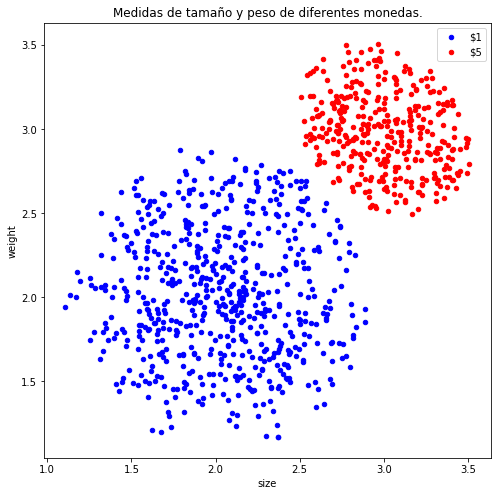

In [80]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = dataset[dataset.type == '$1'].plot.scatter('size', 'weight', c='blue', ax=ax)
dataset[dataset.type == '$5'].plot.scatter('size', 'weight', c='red', ax=ax)
ax.legend(['$1', '$5'])
ax.set_title('Medidas de tamaño y peso de diferentes monedas.');

# El conjunto de hipotesis para el perceptrón
$$ h(\mathbf{x}) =  \mathrm{sign}(\mathbf{w}^\intercal\mathbf{x}_n) $$

Escriba una función que represente el conjunto de hipotesis para el perceptrón. Es decir, dado $\mathrm(w)$ y un $\mathrm{umbral}$ determine si es una moneda de \$1 o de \$5

In [72]:
w = np.random.rand(3)
w

array([ 0.6975905 ,  0.85482667,  0.25265488])

In [73]:
def model(row, w):
    return '$1' if row.values.dot(w) > 0 else '$5'

In [74]:
train_data = dataset[['size', 'weight']]
train_data['x0'] = 1

def guess(w):
    dataset['guess'] = train_data.apply(lambda row: model(row,w), axis=1)
    return dataset

In [75]:
guess(w).head(5)

,size,weight,type,guess
0,2.415939,3.006286,$2,$1
1,2.938768,2.671729,$2,$1
2,1.639263,1.877312,$1,$1
3,1.374895,1.825525,$1,$1
4,2.168431,2.262057,$2,$1


## El algoritmo de aprendizaje del perceptrón
1. Escoger un punto __mal clasificado__:
$$ h(\mathbf{x}) \neq y_n$$
2. Actualizar el vector de pesos:
$$\mathbf{w} = \mathbf{w} + y_n\mathbf{x}_n $$

In [76]:
w = np.random.rand(3)

In [77]:
def get_missclasified(dataset):
    missclasified = dataset[dataset.type != dataset.guess]
    if len(missclasified) > 0:
        return len(missclasified), missclasified.iloc[0]
    return 0, None

errors = []
while True:
    dataset = guess(w)
    n_miss, miss = get_missclasified(dataset)
    errors.append(n_miss/len(dataset))
    if miss is None:
        break
    update = (1 if miss.type == '$1' else -1) * \
              np.array([miss['size'], miss.weight, 1])
    w = w + update

KeyboardInterrupt: 

## Grafique como varia el error en la muestra durante el entrenamiento

In [ ]:
print(w)
#guess(w)

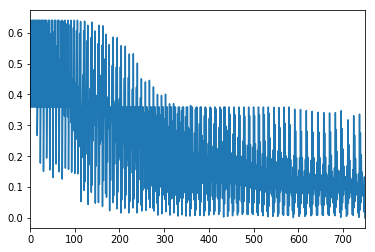

In [44]:
pd.Series(errors).plot()

## Dibuje la linea que divide la clasificación
$$\mathbf{w}^\intercal\mathbf{x}_n = 0$$

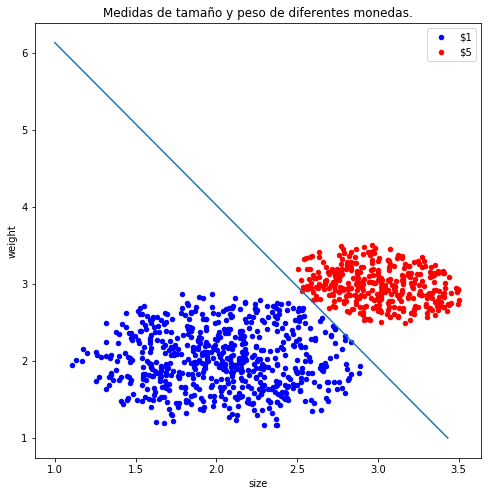

In [45]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax = dataset[dataset.type == '$1'].plot.scatter('size', 'weight', c='blue', ax=ax)
dataset[dataset.type == '$5'].plot.scatter('size', 'weight', c='red', ax=ax)
ax.legend(['$1', '$5'])
ax.set_title('Medidas de tamaño y peso de diferentes monedas.');

#ax.plot([0, -w[2]/w[1]], [-w[2]/w[0], 0], 'k-')

ax.plot([1, -w[2]/w[1] - w[0]/w[1]], [-w[2]/w[0] - w[1]/w[0], 1])